![title](./images/logo_LAconga-oficial.png)
___
#  Análisis de los resultados del examen de estado Saber 11° en Colombia
 
___
El examen de estado Saber 11° es un requisito indispensable para terminar estudios de secundaria en Colombia. Se compone de cinco pruebas: lectura crítica, matemáticas, sociales ciudadanas, ciencias naturales e inglés. Sus resultados son proporcionados por el Instituto Colombiano para la Evaluación de la Educación (ICFES), y pueden ser encontrados [aquí](https://www.datos.gov.co/Educaci-n/Saber-11-2020-2/rnvb-vnyh). Este conjunto de datos representan los resultados correspondiente al Calendario A del año 2020.

La idea general es hacer un análisis exploratorio para buscar posibles relaciones con ciertos aspectos que pueden influir en el rendimiento general y por áreas del las pruebas Saber 11°.

___

En principio, se importan las librerías con las que se va a trabajar:

`pandas` permite manipular y analizar los datos por medio de tablas (DataFrame).

`matplotlib` y `seaborn` ayudar en la mejor visualización de los datos. 

Luego se importa el dataset y se guarda en la variable `df`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/Saber_11__2020-2.csv") #Importamos el archivo .CSV como un Dataframe

Se exploran los datos

In [2]:
df.head() #Muestra las primeras columnas del Dataframe

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,...,55.0,81,A1,244,49,54.882365,3.0,3.0,PUBLICAR,NO
1,PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,33.0,6,A-,238,44,49.252311,2.0,2.0,PUBLICAR,NO
2,TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,59.0,87,A2,325,94,40.733672,1.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,...,47.0,58,A-,238,45,48.217953,2.0,3.0,PUBLICAR,NO
4,TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,...,43.0,40,A-,202,19,60.912192,3.0,3.0,PUBLICAR,NO


**Una descripción detallada de todas las variables que conforman este conjunto de datos la puedes conseguir [aquí](https://www.icfes.gov.co/documents/20143/1885630/6.+Diccionario+Saber11+2019-1+a+2019-2.pdf).**

In [3]:
df.info() #información relevante sobre las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

En las celdas anteriores, se observa el nombre de las 81 columnas, las cuales representan las variables que componen el dataset. En ellas se encuentran información personal, de contacto, socioeconómica, del colegio y los distintos resultados por áreas y general. En total hay 504872 filas, cada una de ellas representa la información completa de un estudiante en particular.

También se tiene información sobre el tipo de variable y la cantidad de datos nulos que possee cada una. 
___
Ahora bien: 

**¿En el desempeño del examen de estado Saber 11° influyen factores como: nacionalidad, departamento, género, edad, estrato socioeconómico, procedencia de un colegio público o privado, nivel de educación de los padres, procedencia de una zona rural o urbana, alimentación, hábitos, entre otras cosas?**

Hagamos algunos cálculos y gráficos para intentar contestar esta pregunta. 

Como muchas variables poseen datos nulos, se hace muy dificil sustituirlos por algún valor, por lo que se eliminaran las filas que contengan los contengan. 

In [4]:
#df.dropna(inplace=True)

Explorando las 10 filas del Dataframe que tenemos a simple vista, pareciera que la columnas 'ESTU_NACIONALIDAD' y 'ESTU_PAIS_RESIDE' son iguales, para corroborar ejecutamos la siguiente celda. 

In [5]:
#Comparamos los valores uno a uno y nos aseguramos que solo arroja "True"
i = (df['ESTU_NACIONALIDAD'] == df['ESTU_PAIS_RESIDE']) 
print(i.unique())

[ True]


In [6]:
df = df.drop(columns = ['ESTU_TIPODOCUMENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_MCPIO_RESIDE', 'ESTU_PAIS_RESIDE', 
                      'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_TIENELAVADORA', 
                      'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TRABAJOLABORPADRE', 'FAMI_NUMLIBROS',
                      'FAMI_TRABAJOLABORMADRE', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO', 
                      'COLE_GENERO', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_MCPIO_UBICACION',
                      'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION',
                      'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL',  'COLE_JORNADA', 'COLE_COD_MCPIO_UBICACION', 'ESTU_COD_DEPTO_PRESENTACION',
                      'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
                      'ESTU_DEPTO_PRESENTACION', 'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL'])
df #Muestra el tamaño del dataframe

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,...,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,SUIZA,F,03/03/2003 12:00:00 AM,No,CUNDINAMARCA,Estrato 2,Técnica o tecnológica completa,Educación profesional completa,Si,Si,...,29,2,33,11,1,55.0,81,A1,244,49
1,VENEZUELA,M,05/10/2002 12:00:00 AM,No,CUNDINAMARCA,Estrato 3,Secundaria (Bachillerato) completa,Educación profesional completa,Si,Si,...,45,2,49,55,2,33.0,6,A-,238,44
2,VENEZUELA,F,12/14/2003 12:00:00 AM,No,CUNDINAMARCA,Estrato 1,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,Si,...,92,3,68,95,3,59.0,87,A2,325,94
3,VENEZUELA,M,04/12/2003 12:00:00 AM,No,CUNDINAMARCA,Sin Estrato,Secundaria (Bachillerato) incompleta,Educación profesional completa,Si,Si,...,43,2,43,38,2,47.0,58,A-,238,45
4,COLOMBIA,F,03/03/2004 12:00:00 AM,No,CUNDINAMARCA,Estrato 5,Secundaria (Bachillerato) completa,Educación profesional completa,Si,Si,...,38,2,32,7,1,43.0,40,A-,202,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504867,COLOMBIA,M,12/26/2003 12:00:00 AM,No,BOGOTÁ,Estrato 2,Técnica o tecnológica completa,Secundaria (Bachillerato) incompleta,Si,No,...,87,3,51,59,2,45.0,52,A-,282,75
504868,COLOMBIA,M,10/27/1996 12:00:00 AM,No,BOGOTÁ,Estrato 2,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,No,...,24,1,53,66,2,54.0,79,A1,257,59
504869,COLOMBIA,F,01/14/2005 12:00:00 AM,No,BOGOTÁ,Estrato 2,Primaria incompleta,Secundaria (Bachillerato) completa,Si,Si,...,90,3,65,91,3,67.0,93,A2,330,95
504870,COLOMBIA,M,06/14/2002 12:00:00 AM,No,BOGOTÁ,Estrato 2,Secundaria (Bachillerato) incompleta,Primaria completa,Si,Si,...,66,2,56,72,3,52.0,75,A1,290,80


Nos quedamos con 371826 filas y 39 columnas. 

Como se evidencia, algunas de ellas no son numéricas, si se quiere estudiar el grado de correlación entre ellas, se hace la conversión. Para ello, se crea una copia del Dataframe original, ya que en muchos casos es preferible tener las etiquetas originales para una mejor visualización de los datos. 

In [7]:
df_copy = df.copy() #copia 

In [8]:
#reemplazamos los valores
df_copy['ESTU_GENERO'].replace(['F', 'M'],[0, 1], inplace=True) 
df_copy['ESTU_TIENEETNIA'].replace(['No', 'Si'],[0, 1], inplace=True) 
df_copy['ESTU_DEPTO_RESIDE'].replace(['CUNDINAMARCA', 'ANTIOQUIA', 'BOLIVAR', 'NORTE SANTANDER', 'CAQUETA', 'RISARALDA', 'SANTANDER', 'MAGDALENA', 'BOGOTÁ', 'CALDAS', 'VALLE', 'SUCRE', 'ATLANTICO', 'QUINDIO', 'LA GUAJIRA', 'HUILA', 'CORDOBA', 'NARIÑO', 'CAUCA', 'CASANARE', 'GUAVIARE',
                                    'PUTUMAYO', 'CESAR', 'CHOCO', 'ARAUCA', 'VICHADA', 'META', 'TOLIMA', 'BOYACA', 'AMAZONAS', 'EXTRANJERO', 'SAN ANDRES', 'VAUPES', 'GUAINIA'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], inplace=True) 
df_copy['FAMI_ESTRATOVIVIENDA'].replace(['Estrato 1', 'Estrato 2',  'Estrato 3',  'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato'],[1, 2, 3, 4, 5, 6, 0], inplace=True)
df_copy['FAMI_EDUCACIONPADRE'].replace(['Técnica o tecnológica completa', 'Secundaria (Bachillerato) completa', 'Primaria incompleta', 'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica incompleta', 'No Aplica', 'Educación profesional completa', 'Primaria completa', 
                                        'No sabe', 'Ninguno', 'Postgrado', 'Educación profesional incompleta'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
df_copy['FAMI_EDUCACIONMADRE'].replace(['Técnica o tecnológica completa', 'Secundaria (Bachillerato) completa', 'Primaria incompleta', 'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica incompleta', 'No Aplica', 'Educación profesional completa', 'Primaria completa', 
                                        'No sabe', 'Ninguno', 'Postgrado', 'Educación profesional incompleta'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
df_copy['FAMI_TIENEINTERNET'].replace(['No', 'Si'],[0, 1], inplace=True) 
df_copy['FAMI_TIENESERVICIOTV'].replace(['No', 'Si'],[0, 1], inplace=True) 
df_copy['FAMI_TIENECOMPUTADOR'].replace(['No', 'Si'],[0, 1], inplace=True)
df_copy['FAMI_TIENECONSOLAVIDEOJUEGOS'].replace(['No', 'Si'],[0, 1], inplace=True)
df_copy['FAMI_COMELECHEDERIVADOS'].replace(['3 a 5 veces por semana', '1 o 2 veces por semana', 'Nunca o rara vez comemos eso', 'Todos o casi todos los días'],[0, 1, 2, 3,], inplace=True)
df_copy['FAMI_COMECARNEPESCADOHUEVO'].replace(['3 a 5 veces por semana', '1 o 2 veces por semana', 'Nunca o rara vez comemos eso', 'Todos o casi todos los días'],[0, 1, 2, 3,], inplace=True)
df_copy['FAMI_COMECEREALFRUTOSLEGUMBRE'].replace(['3 a 5 veces por semana', '1 o 2 veces por semana', 'Nunca o rara vez comemos eso', 'Todos o casi todos los días'],[0, 1, 2, 3,], inplace=True)
df_copy['FAMI_SITUACIONECONOMICA'].replace(['Peor', 'Mejor', 'Igual'],[0, 1, 2], inplace=True)
df_copy['COLE_NATURALEZA'].replace(['OFICIAL', 'NO OFICIAL'],[0, 1], inplace=True)
df_copy['COLE_BILINGUE'].replace(['N', 'S'],[0, 1], inplace=True)
df_copy['COLE_AREA_UBICACION'].replace(['RURAL', 'URBANO'],[0, 1], inplace=True)
df_copy.head()

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,...,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,SUIZA,0.0,03/03/2003 12:00:00 AM,0.0,0.0,2.0,0.0,6.0,1.0,1.0,...,29,2,33,11,1,55.0,81,A1,244,49
1,VENEZUELA,1.0,05/10/2002 12:00:00 AM,0.0,0.0,3.0,1.0,6.0,1.0,1.0,...,45,2,49,55,2,33.0,6,A-,238,44
2,VENEZUELA,0.0,12/14/2003 12:00:00 AM,0.0,0.0,1.0,2.0,3.0,0.0,1.0,...,92,3,68,95,3,59.0,87,A2,325,94
3,VENEZUELA,1.0,04/12/2003 12:00:00 AM,0.0,0.0,0.0,3.0,6.0,1.0,1.0,...,43,2,43,38,2,47.0,58,A-,238,45
4,COLOMBIA,0.0,03/03/2004 12:00:00 AM,0.0,0.0,5.0,1.0,6.0,1.0,1.0,...,38,2,32,7,1,43.0,40,A-,202,19


In [9]:
corr = df_copy.corr() 
corr

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,...,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
ESTU_GENERO,1.000000,-0.007196,0.004682,0.065053,0.013474,0.025802,0.036614,0.005464,0.036318,0.173657,...,0.081608,0.080084,0.077690,0.036837,0.033783,0.035546,0.045606,0.043228,0.072423,0.071798
ESTU_TIENEETNIA,-0.007196,1.000000,0.173323,-0.118808,0.012351,0.018814,-0.163625,-0.067005,-0.118709,-0.066122,...,-0.141512,-0.146246,-0.134358,-0.141235,-0.144943,-0.133022,-0.118291,-0.135099,-0.164638,-0.169036
ESTU_DEPTO_RESIDE,0.004682,0.173323,1.000000,-0.141501,0.003962,0.020071,-0.132628,-0.082942,-0.093932,-0.086994,...,-0.015643,-0.016858,-0.016710,-0.047040,-0.047414,-0.045458,-0.046808,-0.044943,-0.040753,-0.041906
FAMI_ESTRATOVIVIENDA,0.065053,-0.118808,-0.141501,1.000000,0.093807,0.119988,0.330395,0.216522,0.334019,0.297545,...,0.206459,0.198360,0.191989,0.217990,0.209620,0.207223,0.303555,0.265954,0.247218,0.235761
FAMI_EDUCACIONPADRE,0.013474,0.012351,0.003962,0.093807,1.000000,0.283788,0.003523,0.000263,0.019040,0.057794,...,0.042002,0.031396,0.038444,0.045500,0.035789,0.043440,0.083426,0.048360,0.047562,0.034397
FAMI_EDUCACIONMADRE,0.025802,0.018814,0.020071,0.119988,0.283788,1.000000,0.013228,0.011700,0.042536,0.081153,...,0.062071,0.049553,0.056972,0.065011,0.053881,0.061429,0.109172,0.068670,0.068898,0.053223
FAMI_TIENEINTERNET,0.036614,-0.163625,-0.132628,0.330395,0.003523,0.013228,1.000000,0.319330,0.545607,0.243794,...,0.257808,0.260583,0.240327,0.266607,0.269435,0.253316,0.287379,0.297094,0.303811,0.308175
FAMI_TIENESERVICIOTV,0.005464,-0.067005,-0.082942,0.216522,0.000263,0.011700,0.319330,1.000000,0.273961,0.175178,...,0.113675,0.113941,0.105091,0.108943,0.108729,0.102831,0.146462,0.145966,0.132431,0.131578
FAMI_TIENECOMPUTADOR,0.036318,-0.118709,-0.093932,0.334019,0.019040,0.042536,0.545607,0.273961,1.000000,0.272607,...,0.268541,0.268849,0.249912,0.273305,0.273852,0.259489,0.302860,0.303301,0.311451,0.312645
FAMI_TIENECONSOLAVIDEOJUEGOS,0.173657,-0.066122,-0.086994,0.297545,0.057794,0.081153,0.243794,0.175178,0.272607,1.000000,...,0.124941,0.120242,0.116164,0.123925,0.119297,0.117438,0.191967,0.168973,0.148156,0.142126


La matriz de correlación nos da el coeficiente de Pearson entre pares de variables para detectar si existen correlaciones entre ellas. Si el valor es cercano a 1, indica una fuerte correlación positiva; cercano a -1, una fuerte correlación negativa; cercano a 0 (tanto positivo como negativo), indica la ausencia de cualquier correlación entre las dos variables.

Al ser tantas variables, es difícil ver con detalle la matriz de correlación, por lo que para una mejor visualización, se genera un mapa de calor. 

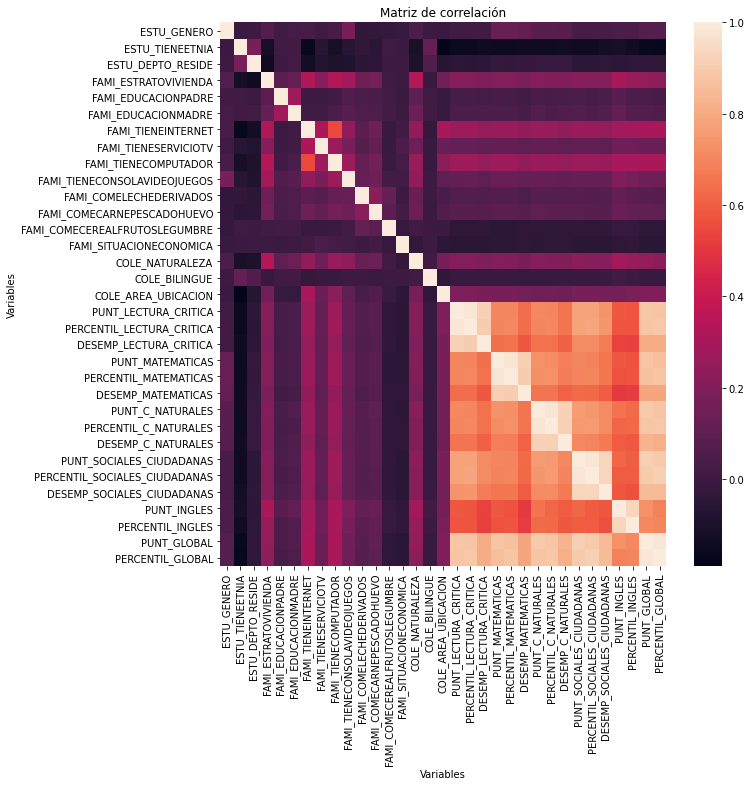

In [10]:
plt.figure(figsize = (10,10)) 
sns.heatmap(df_copy[corr.index].corr( ))

plt.title("Matriz de correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

Si dividimos al mapa de calor en 4 aproximadamente, es de interés para este estudio bien sea el recaudro derecho superior o izquierdo inferior, ya que en esos sectores está el nivel de correlación de las puntuaciones con el resto de variables. 

Se evidencia que 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR' y 'COLE_NATURALEZA' son las que más se relacionan. 

Sin embargo, se hará un análisis de cómo se distribuyen las puntuaciones tomando en cuenta los aspectos antes mencionados. 
___

### Análisis por departamentos

Colombia se divide en 32 departamentos y un distrito capital. [Departamentos de Colombia](https://es.wikipedia.org/wiki/Departamentos_de_Colombia)

En principio, se grafica la distribución de estudiantes por departamentos.


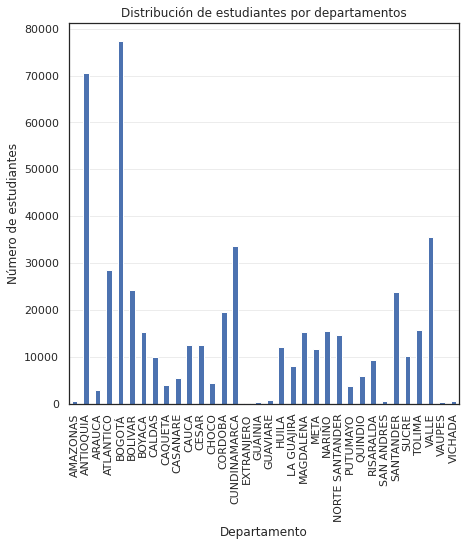

In [11]:
sns.set(rc={'figure.figsize':(7, 7)}) 
sns.set_style("white") #fondo blanco
df.reset_index().groupby(['ESTU_DEPTO_RESIDE']).count().reset_index().plot(x='ESTU_DEPTO_RESIDE', 
                                                                           y='index', 
                                                                           kind='bar', 
                                                                           legend=False, 
                                                                           ylabel='Número de estudiantes', 
                                                                           xlabel='Departamento', 
                                                                           title='Distribución de estudiantes por departamentos',
                                                                           )             
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) #lineas horizontales
plt.show()

Se puede obtener numéricamente esta distribución. 

In [12]:
dep = df.ESTU_DEPTO_RESIDE.value_counts() #conteo de valores en la variable
dep.head()

BOGOTÁ          77344
ANTIOQUIA       70478
VALLE           35442
CUNDINAMARCA    33656
ATLANTICO       28590
Name: ESTU_DEPTO_RESIDE, dtype: int64

Se agrupan los datos por departamentos y se toman las medias aritméticas.

In [13]:
dep_mean = df.groupby('ESTU_DEPTO_RESIDE', as_index=False).mean() 
dep_mean.head(10)

,ESTU_DEPTO_RESIDE,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,AMAZONAS,46.772727,35.043887,2.266458,44.562696,34.161442,2.090909,43.305643,36.647335,1.691223,42.841693,37.023511,1.673981,42.509404,38.432602,221.142633,33.757053
1,ANTIOQUIA,51.852521,49.507180,2.593873,49.621825,46.996949,2.388944,46.621258,45.980746,1.907929,47.838758,49.275192,1.996453,46.261543,48.070816,243.870272,47.511124
2,ARAUCA,50.324523,44.786551,2.485447,49.846102,47.588491,2.416193,47.038474,47.432252,1.929742,46.007026,45.048511,1.868183,44.525259,44.812312,240.062563,45.529943
3,ATLANTICO,51.515110,48.014201,2.569080,50.195523,47.789367,2.419692,47.183841,47.021756,1.942462,47.110983,47.224169,1.944491,46.983874,49.479958,244.231235,47.133438
4,BOGOTÁ,55.556734,60.114450,2.838216,55.034469,60.563340,2.702007,51.746742,60.434164,2.254073,52.533823,60.815616,2.300954,51.259265,61.543261,267.644122,61.895816
5,BOLIVAR,48.890745,40.637044,2.397692,47.046729,39.908279,2.228558,44.533331,39.433794,1.764577,44.151145,39.896204,1.757795,44.048842,41.396286,229.965305,38.388553
6,BOYACA,53.834316,55.047188,2.723358,54.336872,58.564360,2.661751,51.032835,58.348211,2.201271,50.846048,56.692948,2.190720,47.961922,54.313999,260.812230,57.771333
7,CALDAS,52.604462,51.356547,2.647071,51.105517,50.257562,2.478645,49.027635,52.540247,2.067028,48.927846,51.986735,2.062205,47.187921,51.493217,250.835192,51.564265
8,CAQUETA,49.893744,43.612461,2.464064,48.878490,44.847725,2.352120,46.031541,44.483713,1.865564,45.931231,44.728800,1.865564,44.306101,43.992244,237.126939,43.539297
9,CASANARE,51.900927,49.450282,2.595165,51.779495,52.279404,2.522450,48.618978,51.650245,2.037811,47.846755,49.337393,1.992365,46.173423,49.284130,248.702054,50.542265


Se grafica el promedio global de cada departamento.

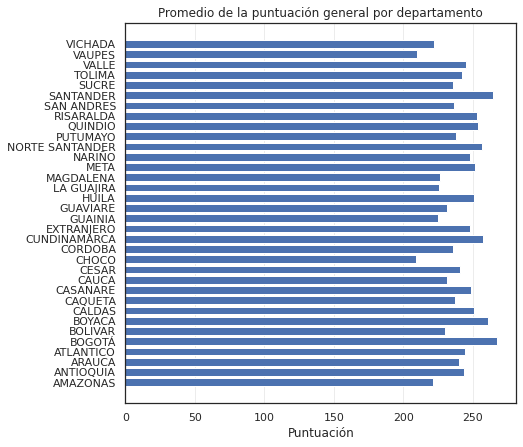

In [14]:
plt.barh(dep_mean['ESTU_DEPTO_RESIDE'], dep_mean['PUNT_GLOBAL'], 0.75)
plt.xlabel('Puntuación')
plt.title('Promedio de la puntuación general por departamento')
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) #lineas verticales
plt.show()

En el histograma se observa que en promedio el departamento con puntuación más alta es Bogotá, seguido de Santander y Boyacá.

Con un diagrama o gráfica de caja se puede hacer un análisis mas detallado, como qué tan dispersas entán las puntuaciones en cada departamento, en qué rango se encuentra la mayor concentración de estudiantes y los datos atípicos, bien sea aquellos que representan puntuaciones muy bajas o muy altas.  

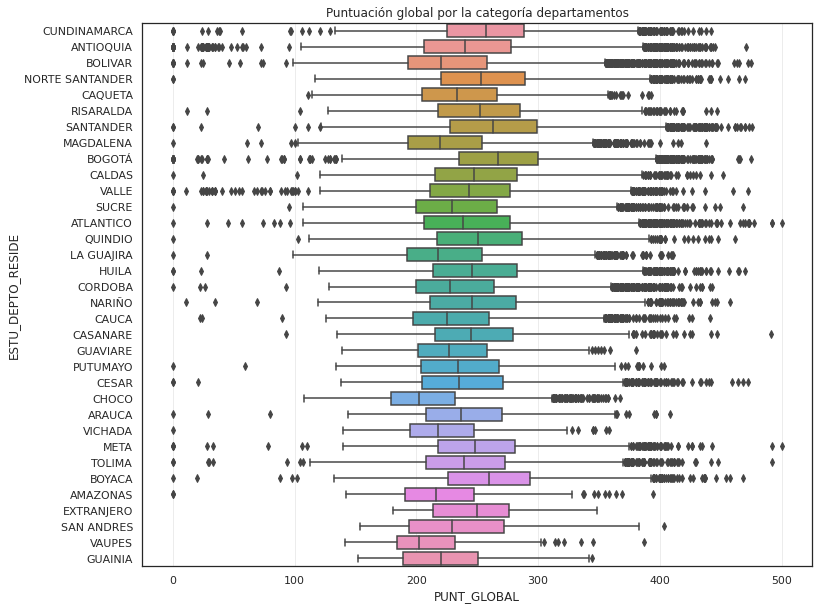

In [15]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.set_style("white") 
sns.boxplot(y=df.ESTU_DEPTO_RESIDE, x=df.PUNT_GLOBAL,  orient="h")
plt.title("Puntuación global por la categoría departamentos")
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) 
plt.show()

Se puede observar que los departamentos Meta y Atlántico alcanzaron una puntuación de 500, y que Casanare y Tolima estuvieron cerca de alcanzarla. En los departamentos San Andrés, Vaupes, Guainia, Guaviare y Caquetá la puntuación más baja estuvo por encima de los 100 puntos, en contraste con la mayoría de los departamentos donde hubo puntuaciones en cero. En Bogotá y Santander las puntuaciones son más altas, abarcando un rango entre 250 y 300 aproximadamente, seguido de Boyacá. Otra cosa que observamos es que hay más valores atípicos en las puntuaciones altas que en las bajas en la mayoría de los departamentos. 

El diagrama de violín da un poco de información adicional sobre esta distribución, una característica que será muy útil es el ancho de la densidad del gráfico que nos mostrará dónde la frecuencia es más alta. 

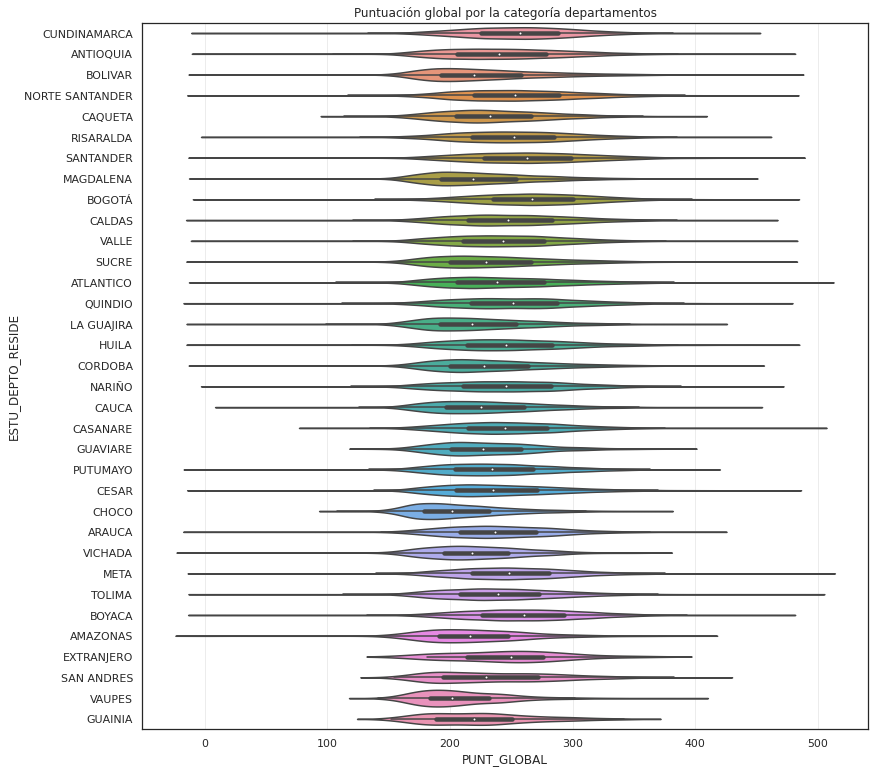

In [16]:
sns.set(rc={'figure.figsize':(13, 13)})
sns.set_style("white") 
sns.violinplot(y=df.ESTU_DEPTO_RESIDE, x=df.PUNT_GLOBAL,  orient="h")
plt.title("Puntuación global por la categoría departamentos")
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) 
plt.show()

In [17]:
punt = df.groupby(['PUNT_GLOBAL', 'ESTU_DEPTO_RESIDE'])['ESTU_DEPTO_RESIDE'].count()
punt = punt.reset_index(name='CONTEO')
punt.head()

,PUNT_GLOBAL,ESTU_DEPTO_RESIDE,CONTEO
0,0,AMAZONAS,2
1,0,ANTIOQUIA,22
2,0,ARAUCA,1
3,0,ATLANTICO,1
4,0,BOGOTÁ,16


<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='CONTEO'>

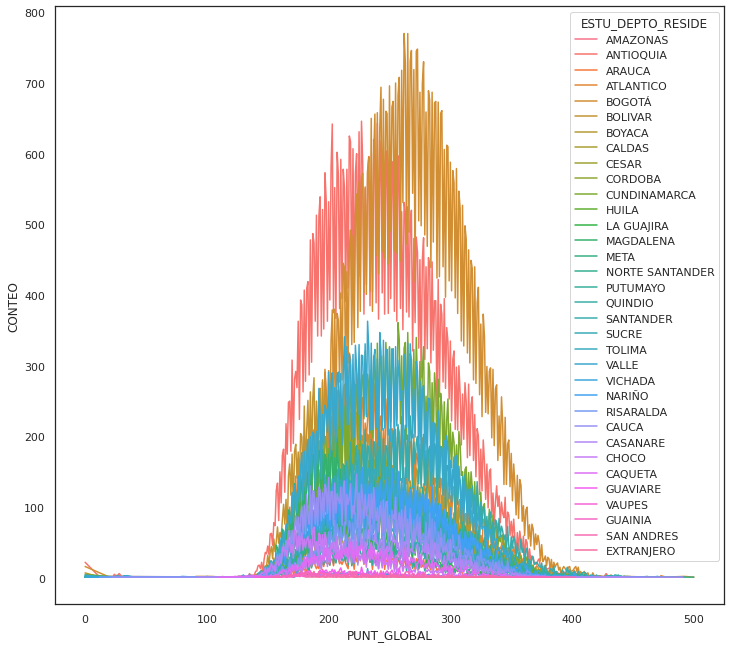

In [18]:
sns.set(rc={'figure.figsize':(12, 11)})
sns.set_style("white") 

sns.lineplot(x='PUNT_GLOBAL', y='CONTEO', hue='ESTU_DEPTO_RESIDE', data=punt)

### Análisis por género

Al pedir los valores para esta variable, encontramos dos valores: masculino (M) y femenino (F).

In [19]:
df.ESTU_GENERO.unique() #valores en la variable

array(['F', 'M', nan], dtype=object)

Se calcula y se grafica la frecuencia de cada uno.

F    276572
M    228292
Name: ESTU_GENERO, dtype: int64


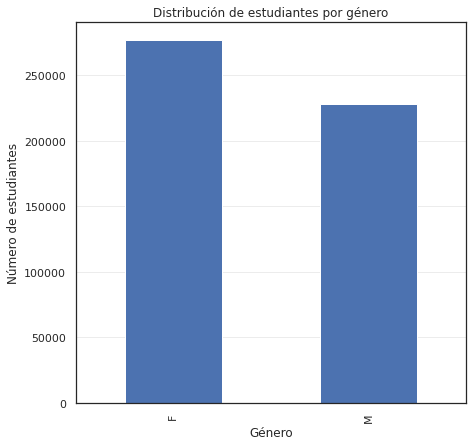

In [20]:
print(df.ESTU_GENERO.value_counts())
sns.set(rc={'figure.figsize':(7, 7)}) 
sns.set_style("white") 
df.reset_index().groupby(['ESTU_GENERO']).count().reset_index().plot(x = 'ESTU_GENERO', y = 'index', kind = 'bar', 
                                                                       legend=False, 
                                                                       ylabel='Número de estudiantes', 
                                                                       xlabel='Género', 
                                                                       title='Distribución de estudiantes por género',
                                                                       )
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

Se puede apreciar numérica y gráficamente que hay más estudiantes de género femenino.

Se calcula el promedio de los variables numéricas y se grafica en conjunto las puntuaciones y percentiles globales por género con el fin de establecer similitudes y diferencias.

In [21]:
gen = df.groupby(by='ESTU_GENERO', as_index=False).mean()
gen

,ESTU_GENERO,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,F,52.054760,49.799933,2.605933,49.680571,46.864278,2.395792,47.418904,48.171257,1.959229,47.833277,49.351319,1.994027,46.414722,48.987537,245.143091,48.212343
1,M,52.280325,50.671158,2.621231,52.642107,54.306441,2.561728,49.140504,52.815718,2.076722,48.719267,51.312236,2.053002,47.451348,51.500053,252.228527,52.381936


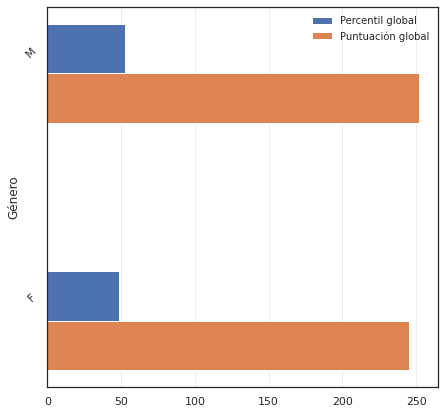

In [22]:
x_labels = gen['ESTU_GENERO']
xs = np.array(range(len(x_labels))) #configuración de una barra al lado de la otra

p1 = plt.barh(xs+0.1, gen['PERCENTIL_GLOBAL'], 0.2, label='Percentil global', tick_label=x_labels)
p2 = plt.barh(xs-0.1, gen['PUNT_GLOBAL'], 0.2, label='Puntuación global')

plt.ylabel('Género')
plt.yticks(rotation=45)
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) 
plt.legend(loc=1,fontsize=10, frameon=False)
plt.show()

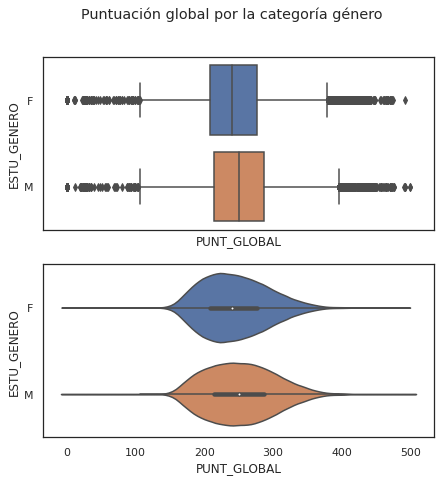

In [23]:
fig, axes = plt.subplots(2, sharex=True, sharey=True)

sns.boxplot(x=df.PUNT_GLOBAL, y=df.ESTU_GENERO, orient="h", ax=axes[0], labels=None)
sns.violinplot(x=df.PUNT_GLOBAL, y=df.ESTU_GENERO, orient="h",  ax=axes[1])

plt.suptitle("Puntuación global por la categoría género")
plt.show()

En el histograma se evidencia que en promedio la puntuación global del género masculino es más alto con respecto al femenino, así como también el percentil global. Esto se confirma con la gráfica de caja de las puntuaciones, donde se evidencia que este género tiene puntuaciones más altas, inclusive, las dos puntuciones iguales a 500 en Meta y Atlántico pertenecen a éste. En la gráfica de violín también observamos que la frecuencia más alta es mayor en el género masculino. 

A continuación, se hace un gráfico específico para cada prueba.

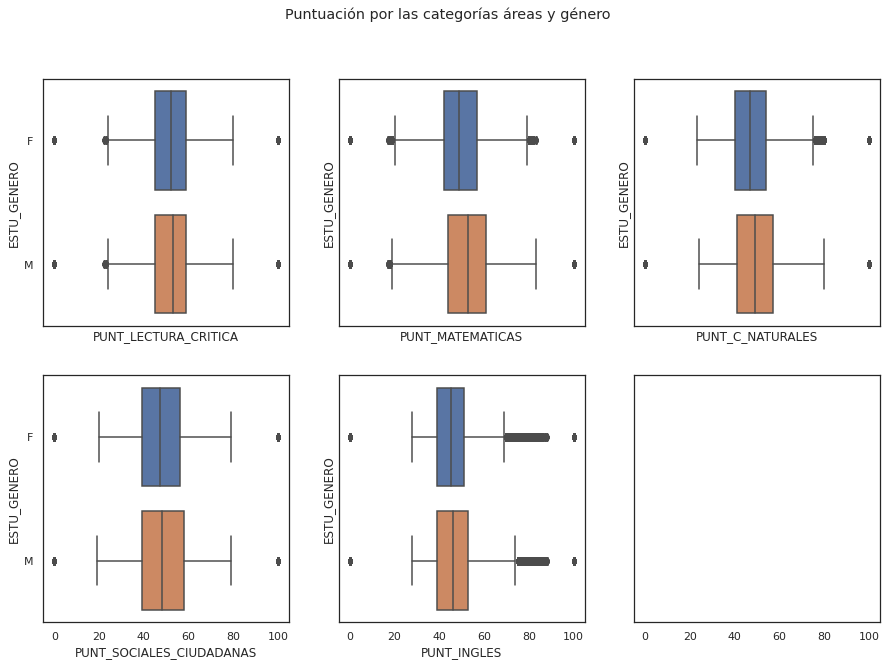

In [24]:
sns.set_style("white")
fig, axes = plt.subplots(2, 3,figsize=(15,10), sharex=True, sharey=True)

sns.boxplot(y=df.ESTU_GENERO, x=df.PUNT_LECTURA_CRITICA,  orient="h", ax=axes[0,0])
sns.boxplot(y=df.ESTU_GENERO, x=df.PUNT_MATEMATICAS,  orient="h", ax=axes[0,1])
sns.boxplot(y=df.ESTU_GENERO, x=df.PUNT_C_NATURALES,  orient="h", ax=axes[0,2])
sns.boxplot(y=df.ESTU_GENERO, x=df.PUNT_SOCIALES_CIUDADANAS,  orient="h", ax=axes[1,0])
sns.boxplot(y=df.ESTU_GENERO, x=df.PUNT_INGLES,  orient="h", ax=axes[1,1])

#fig.supylabel('Género')
fig.suptitle('Puntuación por las categorías áreas y género')
plt.show()

Se evidencia que el género masculino tiene mejor desempeño en matemáticas y ciencias naturales. En las otras áreas no hay diferencias significativas. 

In [25]:
punt_gen = df.groupby(['PUNT_GLOBAL', 'ESTU_GENERO'])['ESTU_GENERO'].count()
punt_gen = punt_gen.reset_index(name='CONTEO')
punt_gen.tail()

,PUNT_GLOBAL,ESTU_GENERO,CONTEO
796,477,M,1
797,491,M,1
798,492,F,1
799,492,M,3
800,500,M,2


<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='CONTEO'>

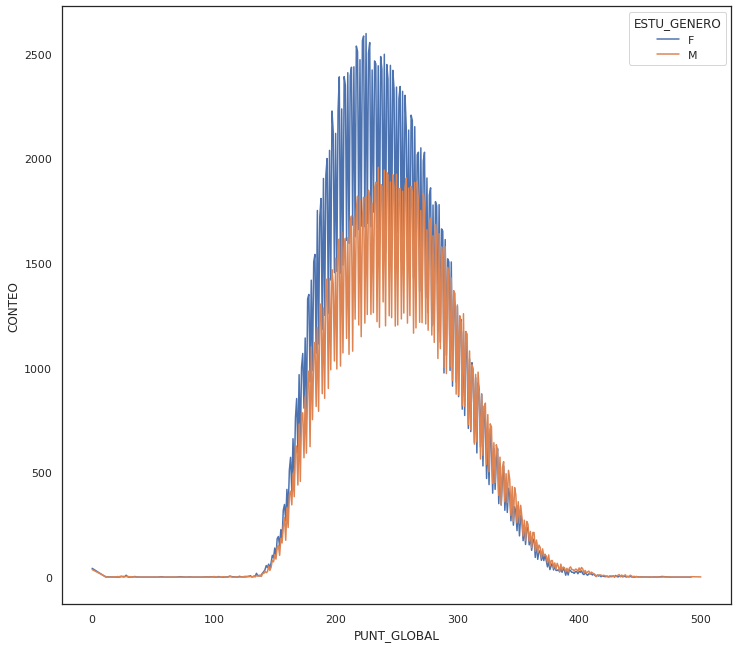

In [26]:
sns.set(rc={'figure.figsize':(12, 11)})
sns.set_style("white") 
sns.lineplot(data=punt_gen, x='PUNT_GLOBAL', y='CONTEO', hue='ESTU_GENERO')

### Análisis por estrato socioeconómico

En Colombia, los estratos socioeconómicos en los que se pueden clasificar las viviendas son:

- 1 (Bajo-bajo)
- 2 (Bajo)
- 3 (Medio-bajo)
- 4 (Medio)
- 5 (Medio-alto) 
- 6 (Alto) 

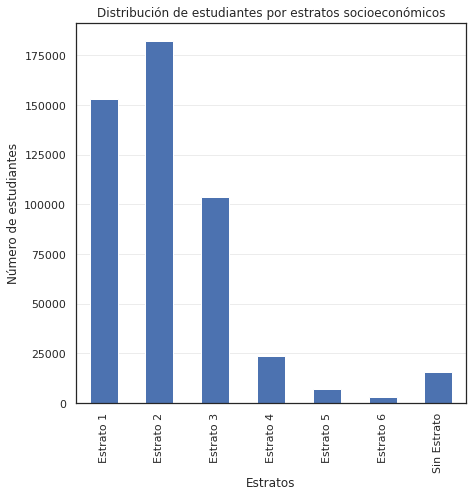

In [27]:
sns.set(rc={'figure.figsize':(7, 7)})
sns.set_style("white")
df.reset_index().groupby(['FAMI_ESTRATOVIVIENDA']).count().reset_index().plot(x='FAMI_ESTRATOVIVIENDA', y = 'index', kind = 'bar', 
                                                                       legend=False, 
                                                                       ylabel='Número de estudiantes', 
                                                                       xlabel='Estratos', 
                                                                       title='Distribución de estudiantes por estratos socioeconómicos',
                                                                       )
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

Se observa que la mayoría de los estudiantes, por lo menos en este conjunto de datos, pertenecen a los estratos 2, 1 y 3. 

In [28]:
est = df.groupby(by='FAMI_ESTRATOVIVIENDA', as_index=False).mean()
est

,FAMI_ESTRATOVIVIENDA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,Estrato 1,50.081641,44.111945,2.475545,48.747233,44.457881,2.344987,46.191237,44.741024,1.875893,45.736045,44.271210,1.854251,43.823423,42.435820,236.959405,43.368526
1,Estrato 2,52.640378,51.571346,2.644365,51.502880,51.524122,2.504635,48.603164,51.589572,2.038213,48.637641,51.433777,2.046736,46.824819,50.994751,250.375073,51.601370
2,Estrato 3,54.740763,57.636379,2.783071,53.785794,57.261497,2.625640,50.772429,57.382878,2.183950,51.273761,57.585958,2.219266,50.454071,59.227861,262.372805,58.454998
3,Estrato 4,56.053233,61.021225,2.866854,55.794442,61.384947,2.710395,52.764054,61.412224,2.314666,53.483442,61.553638,2.367302,55.449565,66.662831,272.970081,62.795252
4,Estrato 5,55.105713,58.241772,2.805670,54.822909,58.714917,2.643824,51.738282,58.020231,2.245334,52.715771,59.020231,2.308591,55.915051,64.825331,268.875338,59.565180
5,Estrato 6,52.193967,50.436588,2.608174,51.546221,51.110931,2.449562,48.647746,49.752189,2.041194,49.589361,51.575414,2.111255,53.556132,57.937074,253.647421,50.923127
6,Sin Estrato,44.349434,28.356791,2.097754,42.778389,29.525174,1.981767,41.153285,30.095195,1.532276,39.823172,29.227049,1.471819,40.547276,31.570149,209.560105,26.307146


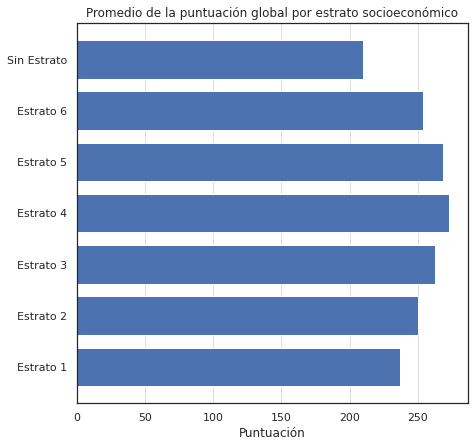

In [29]:
plt.barh(est.FAMI_ESTRATOVIVIENDA, est['PUNT_GLOBAL'], 0.75)
plt.xlabel('Puntuación')
plt.title('Promedio de la puntuación global por estrato socioeconómico')
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25) #add vertical grid lines
plt.show()

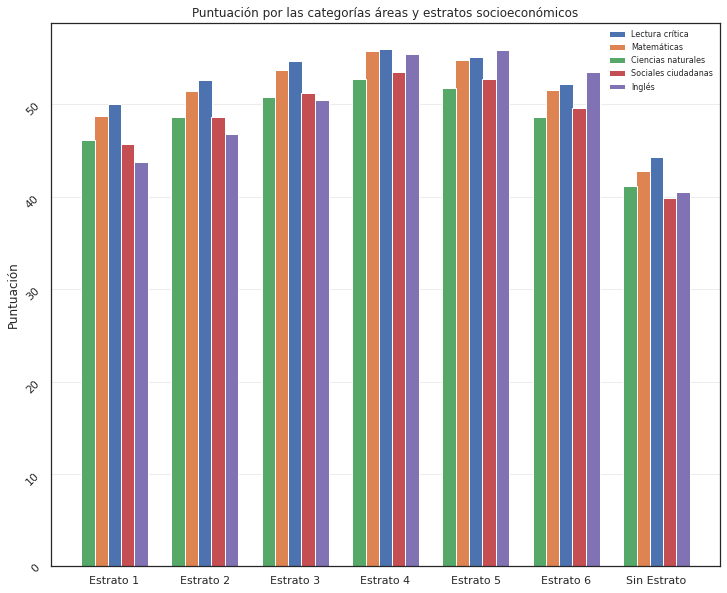

In [30]:
x_labels = est['FAMI_ESTRATOVIVIENDA']
xs = np.array(range(len(x_labels)))

plt.figure(figsize=(12,10))
p1 = plt.bar(xs+0.075, est['PUNT_LECTURA_CRITICA'], 0.15, label='Lectura crítica', tick_label=x_labels)
p2 = plt.bar(xs-0.075, est['PUNT_MATEMATICAS'], 0.15, label='Matemáticas')
p3 = plt.bar(xs-0.22, est['PUNT_C_NATURALES'], 0.15, label='Ciencias naturales')
p4 = plt.bar(xs+0.22, est['PUNT_SOCIALES_CIUDADANAS'], 0.15, label='Sociales ciudadanas')
p5 = plt.bar(xs+0.37, est['PUNT_INGLES'], 0.15, label='Inglés')

plt.ylabel('Puntuación')
plt.title('Puntuación por las categorías áreas y estratos socioeconómicos')
plt.yticks(rotation=45)
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='gray', alpha=.15)
plt.legend(loc=1,fontsize=8, frameon=False)
plt.show()

Los estratos 4 y 5 en promedio tienen puntuaciones más alta en todas las áreas.

Los estratos 5 y 6 en Inglés, particularmente, tienen puntuaciones mayores que el resto de las áreas, a diferencia de los estratos 1, 2 y 3 donde Inglés está por debajo de las otras áreas. 

No se tiene certeza, ni una versión oficial, del significado de la categoría 'sin estrato', se asume que podría ser de los estudiantes que vienen de otros países o proveniente de poblaciones que no están estratificadas, el punto es que esta categoría en promedio tienen las puntuaciones más bajas. 

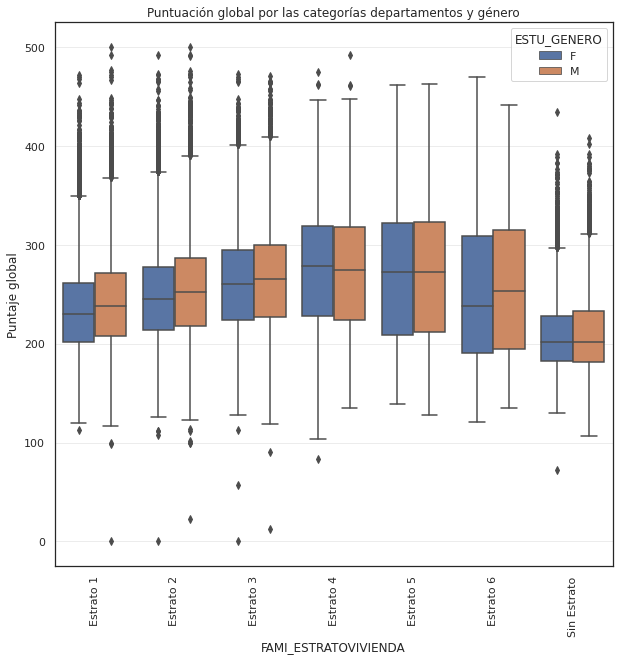

In [31]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("white")
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', hue='ESTU_GENERO', data=df, 
            order=['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato'])

plt.xticks(rotation=90)
plt.ylabel('Puntaje global')
plt.title('Puntuación global por las categorías departamentos y género')
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

Como se puede ver en las gráficas anteriores, los estratos 4, 5 y 6 tienen puntuaciones más altas que el resto. 

___

### Análisis por nacionalidad

In [32]:
df.ESTU_NACIONALIDAD.value_counts().head(10)

COLOMBIA          501708
VENEZUELA           2927
ESTADOS UNIDOS        46
ECUADOR               37
ESPAÑA                29
CUBA                   9
PERÚ                   9
BRASIL                 8
ARGENTINA              8
PANAMÁ                 7
Name: ESTU_NACIONALIDAD, dtype: int64

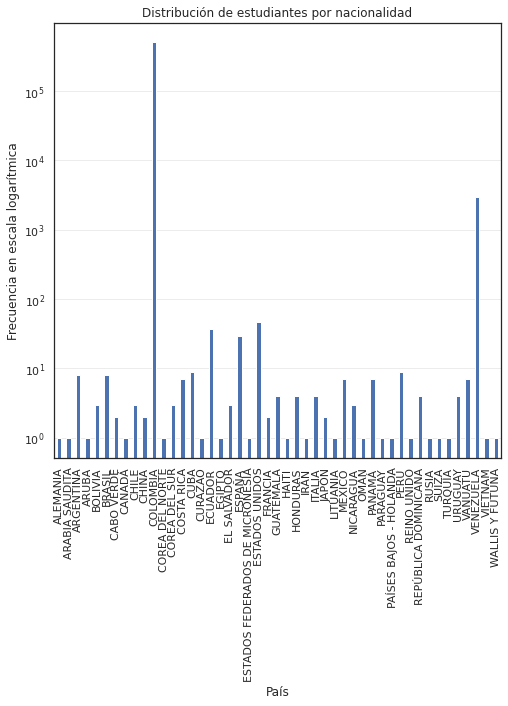

In [33]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.set_style("white") 
df.reset_index().groupby(['ESTU_NACIONALIDAD']).count().reset_index().plot(x='ESTU_NACIONALIDAD', 
                                                                           y='index', 
                                                                           kind='bar', 
                                                                           legend=False, 
                                                                           ylabel='Frecuencia en escala logarítmica', 
                                                                           xlabel='País',
                                                                           title='Distribución de estudiantes por nacionalidad',
                                                                           logy=True)     
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

Como es de esperarse, Colombia tiene la frecuencia más alta, seguido por Venezuela, Estados Unidos, Ecuador y España. 

A continuación, se grafica el rendimiento global de las distintas nacionalidades. 

In [34]:
nac = df.groupby('ESTU_NACIONALIDAD').mean()
nac.head()

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
ESTU_NACIONALIDAD,,,,,,,,,,,,,,,,
ALEMANIA,56.000000,63.000000,3.000000,51.000,51.000,3.000000,59.000000,84.000000,3.000000,51.000000,60.000000,2.000000,75.000000,98.000000,279.000000,73.000000
ARABIA SAUDITA,68.000000,94.000000,4.000000,74.000,98.000,4.000000,70.000000,98.000000,3.000000,76.000000,100.000000,4.000000,58.000000,86.000000,355.000000,99.000000
ARGENTINA,62.250000,79.750000,3.250000,62.375,80.375,3.250000,56.250000,74.250000,2.500000,60.875000,80.000000,2.750000,67.625000,88.625000,305.000000,83.500000
ARUBA,53.000000,51.000000,3.000000,44.000,30.000,2.000000,32.000000,5.000000,1.000000,43.000000,37.000000,2.000000,71.000000,96.000000,226.000000,36.000000
BOLIVIA,67.666667,87.333333,3.666667,72.000,96.000,3.666667,64.333333,92.333333,3.333333,65.333333,90.666667,3.333333,64.666667,89.666667,335.333333,94.333333


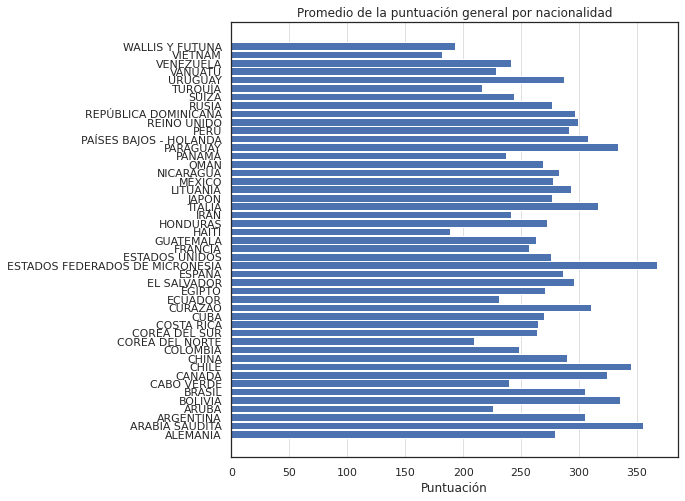

In [35]:
plt.barh(nac.index, nac['PUNT_GLOBAL'], 0.90)
plt.title('Promedio de la puntuación general por nacionalidad')
plt.xlabel('Puntuación')
plt.yticks()
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25) #add vertical grid lines

plt.show()

Este histograma nos muestra en promedio las puntuaciones de las distintas nacionalidades, sin embargo, estos resultados no son muy confiables porque las diferencias en las frecuencias son muy altas. Por ejemplo, Micronesia y Arabia Saudita, los dos países con el promedio más alto, tienen un solo estudiante. 

A continuación se hace un gráfico de caja para ver mejor la distribución, la dispersión y la mayor concentración de las puntuaciones.

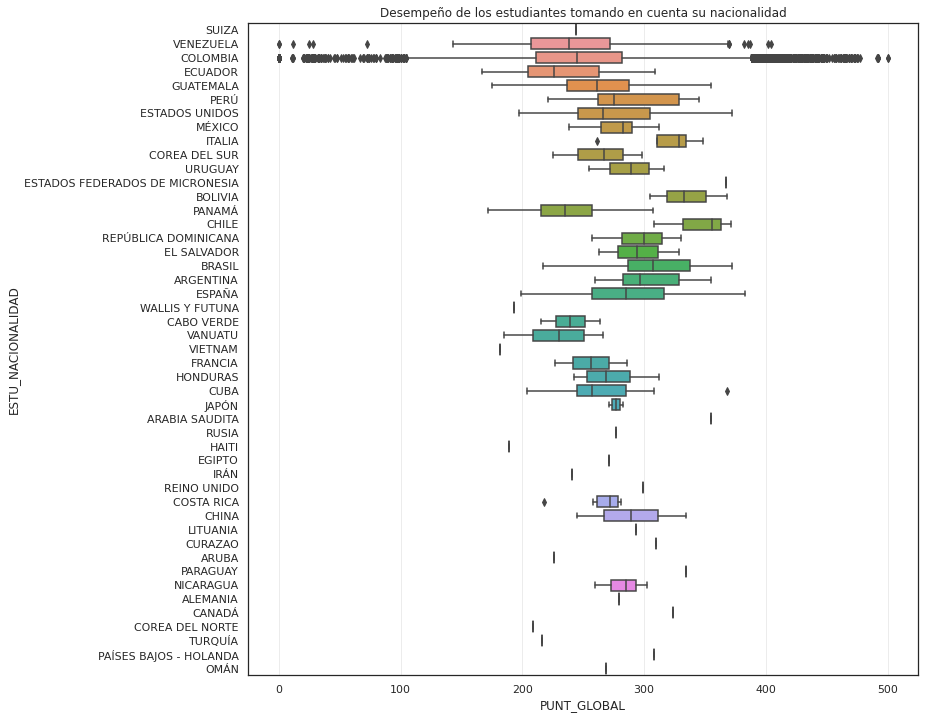

In [36]:
sns.set(rc={'figure.figsize':(12, 12)})
sns.set_style("white")

sns.boxplot(y=df.ESTU_NACIONALIDAD, x=df.PUNT_GLOBAL,  orient="h")
plt.title("Desempeño de los estudiantes tomando en cuenta su nacionalidad")
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15) 
plt.show()

Al observar las gráficas de cajas por nacionalidades vemos que el único país que ha alcanzado una puntuación de 500 es Colombia, pero tambien de 0 puntos junto con Venezuela. Al ser Colombia la nacionalidad con más estudiantes, y por una diferencia muy grande, los bigotes de la caja y los valores atípicos van desde 0 hasta 500, abarcando todo el rango de puntuación. 

Comparando el resto de países, España y Estados Unidos son los que tienen puntuaciones más altas, es normal que estén más dispersos porque tienen más estudiantes que Chile, por ejemplo, que tiene la caja con puntuaciones más altas, junto con Bolivia e Italia. 

___
### Análisis por naturaleza del colegio

En Colombia los colegios se distinguen por ser:
- Oficial (público)
- No oficial (privado)

In [37]:
df.COLE_NATURALEZA.value_counts().head(10)

OFICIAL       391470
NO OFICIAL    113402
Name: COLE_NATURALEZA, dtype: int64

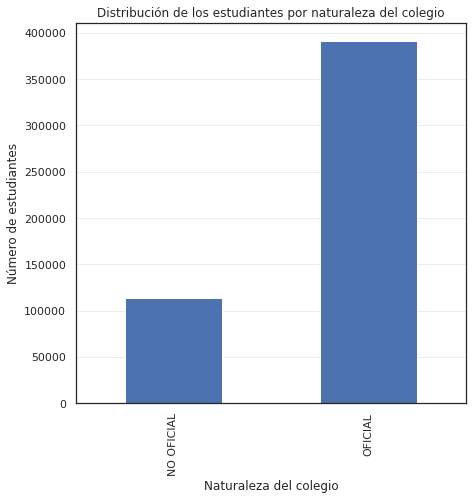

In [38]:
sns.set(rc={'figure.figsize':(7, 7)})
sns.set_style("white")

df.reset_index().groupby(['COLE_NATURALEZA']).count().reset_index().plot(x='COLE_NATURALEZA', 
                                                                         y='index', 
                                                                         kind='bar', 
                                                                         legend=False, 
                                                                         ylabel='Número de estudiantes', 
                                                                         xlabel='Naturaleza del colegio',
                                                                         title ='Distribución de los estudiantes por naturaleza del colegio')              
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

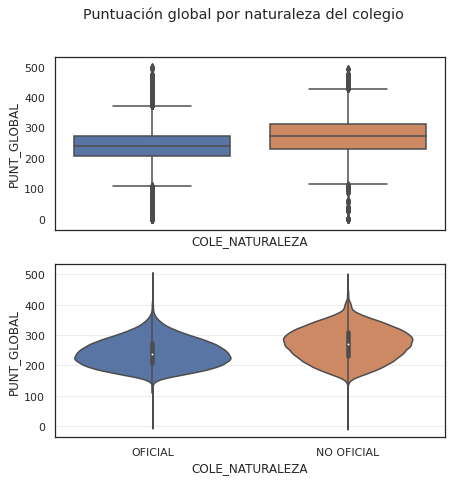

In [39]:
fig, axes = plt.subplots(2, sharex=True, sharey=True)
sns.boxplot(y=df.PUNT_GLOBAL, x=df.COLE_NATURALEZA,  orient='v', ax=axes[0])
sns.violinplot(y=df.PUNT_GLOBAL, x=df.COLE_NATURALEZA, orient="v",  ax=axes[1])

plt.suptitle("Puntuación global por naturaleza del colegio")
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

Hay una diferencia muy notable en cuanto a la puntuación global entre los colegios oficiales y no oficiales. La puntuación de los colegio oficiales está por encima, donde su mediana está casi a nivel con el tercer cuartil de los colegios oficiales, sin embargo, estos últimos han alcanzado puntuaciones de 500 puntos. Los dos han tenido puntuaciones en cero. 

In [40]:
col = df.groupby(by='COLE_NATURALEZA', as_index=False).mean()
col

,COLE_NATURALEZA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,NO OFICIAL,56.080501,61.269431,2.869888,55.430425,60.951086,2.705481,52.333230,61.009065,2.289245,53.172396,61.574637,2.343812,53.129270,63.914155,270.838486,62.582494
1,OFICIAL,51.020152,46.985600,2.538394,49.742059,47.123729,2.402851,46.999287,47.160855,1.932146,46.803354,46.954111,1.927095,45.072757,46.128822,241.831742,46.481253


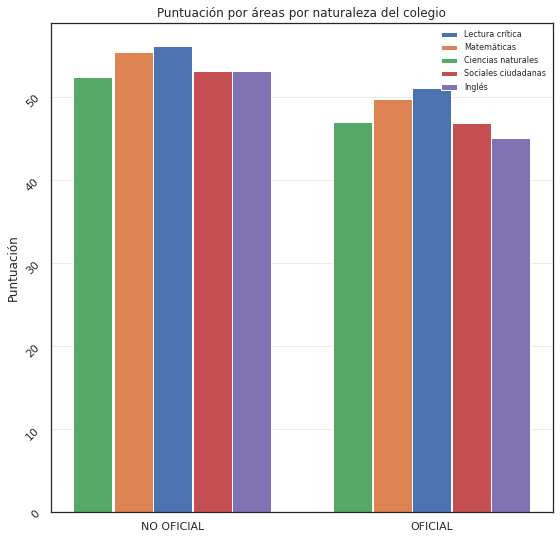

In [41]:
sns.set(rc={'figure.figsize':(9, 9)})
sns.set_style("white")
x_labels = col['COLE_NATURALEZA']
xs = np.array(range(len(x_labels)))

p1 = plt.bar(xs+0.075, col['PUNT_LECTURA_CRITICA'], 0.15, label='Lectura crítica', tick_label=x_labels)
p2 = plt.bar(xs-0.075, col['PUNT_MATEMATICAS'], 0.15, label='Matemáticas')
p3 = plt.bar(xs-0.23, col['PUNT_C_NATURALES'], 0.15, label='Ciencias naturales')
p4 = plt.bar(xs+0.23, col['PUNT_SOCIALES_CIUDADANAS'], 0.15, label='Sociales ciudadanas')
p5 = plt.bar(xs+0.38, col['PUNT_INGLES'], 0.15, label='Inglés')

plt.ylabel('Puntuación')
plt.title('Puntuación por áreas por naturaleza del colegio')
plt.yticks(rotation=45)
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='white', alpha=.25)
plt.legend(loc=1,fontsize=8, frameon=False)
plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.15)
plt.show()

En promedio los colegios oficiales tienen puntuaciones más altas que los colegios oficiales. 

Se cree que la naturaleza de los colegios está muy relacionados con los estrato. Los estudiantes de colegios oficiales pertencen a estratos bajos y los estudiantes de colegios no oficales a estratos altos. 

A continuación se determina si en este conjunto de datos se evidencia esta relación. 

In [42]:
col_est = df.groupby(['COLE_NATURALEZA', 'FAMI_ESTRATOVIVIENDA'])['FAMI_ESTRATOVIVIENDA'].count()
col_est = col_est.reset_index(name='CONTEO')
col_est

,COLE_NATURALEZA,FAMI_ESTRATOVIVIENDA,CONTEO
0,NO OFICIAL,Estrato 1,14026
1,NO OFICIAL,Estrato 2,35514
2,NO OFICIAL,Estrato 3,38517
3,NO OFICIAL,Estrato 4,14101
4,NO OFICIAL,Estrato 5,4363
5,NO OFICIAL,Estrato 6,1659
6,NO OFICIAL,Sin Estrato,1130
7,OFICIAL,Estrato 1,138826
8,OFICIAL,Estrato 2,146808
9,OFICIAL,Estrato 3,65033


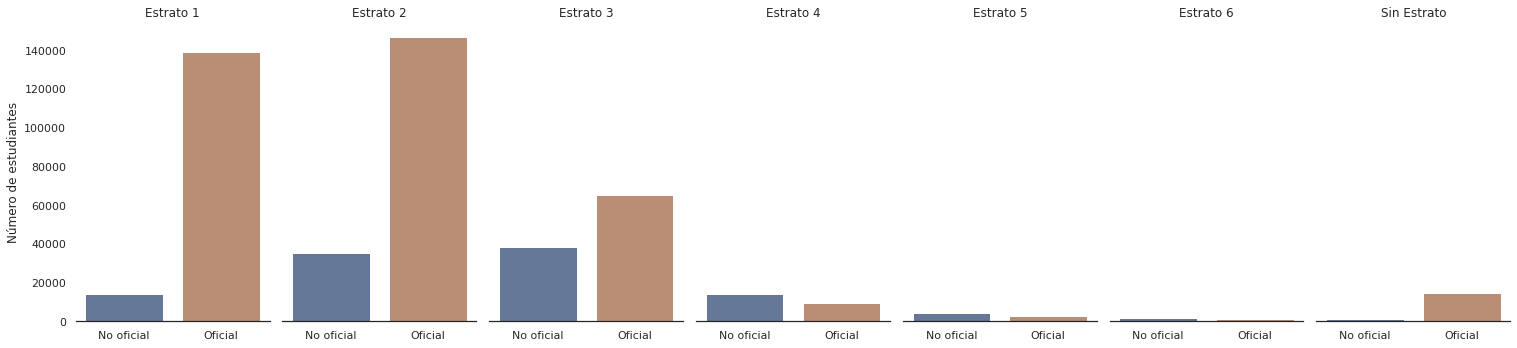

In [43]:
fig = sns.catplot(x='COLE_NATURALEZA', y='CONTEO', col='FAMI_ESTRATOVIVIENDA',
                data=col_est, 
                saturation=.5,
                kind="bar", 
                aspect=.6)
fig.set_axis_labels('', 'Número de estudiantes')
fig.set_xticklabels(['No oficial', 'Oficial'])
fig.set_titles('{col_name}')
fig.despine(left=True)

plt.show()

### Análisis por alimentación

Algunas de las variables de este conjunto de datos son sobre el tipo de alimentación y la frecuencia con que se consumen. Se considera el consumo de:

- Carne, pescado y huevo
- Leche y derivados
- Cereal, frutos y legumbres

Se analizará la variaciación del puntaje global tomando en cuenta el consumo alimenticio. 

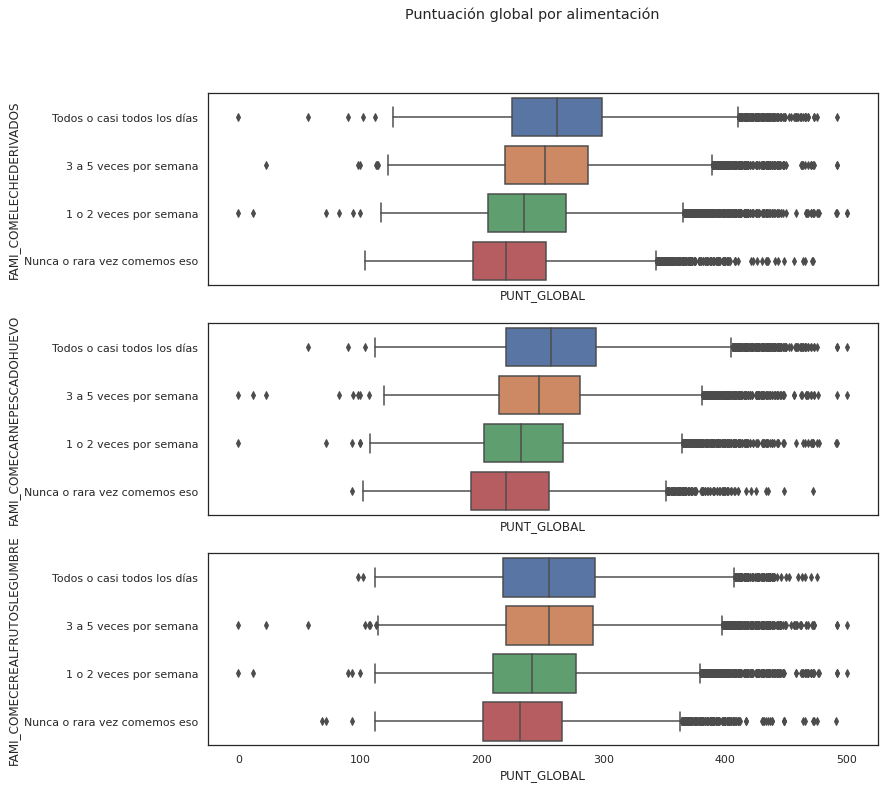

In [44]:
sns.set(rc={'figure.figsize':(12, 12)})
sns.set_style("white")
fig, axes = plt.subplots(3, sharex=True, sharey=True)

sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(y=df.FAMI_COMELECHEDERIVADOS, x=df.PUNT_GLOBAL,  orient='h', ax=axes[0], order=['Todos o casi todos los días', '3 a 5 veces por semana', '1 o 2 veces por semana', 'Nunca o rara vez comemos eso'])
sns.boxplot(y=df.FAMI_COMECARNEPESCADOHUEVO, x=df.PUNT_GLOBAL, orient="h",  ax=axes[1], order=['Todos o casi todos los días', '3 a 5 veces por semana', '1 o 2 veces por semana', 'Nunca o rara vez comemos eso'])
sns.boxplot(y=df.FAMI_COMECEREALFRUTOSLEGUMBRE, x=df.PUNT_GLOBAL, orient="h",  ax=axes[2], order=['Todos o casi todos los días', '3 a 5 veces por semana', '1 o 2 veces por semana', 'Nunca o rara vez comemos eso'])

plt.suptitle("Puntuación global por alimentación")
plt.show()

El comportamiento general es que a medida que consumen más estos alimentos, la puntuación global sube.